**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [2]:
#@ GETTING LIBRARIES AND DEPENDENCIES: 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import manifold
from sklearn import metrics
from sklearn import model_selection
%matplotlib inline

#@ IGNORING WARNINGS: 
import warnings
warnings.filterwarnings("ignore")

**ACCURACY:**
- It is one of the most straightforward metrics used in machine learning. It defines how accurate the model is. 

In [3]:
#@ INITIALIZING ACCURACY FUNCTION: 
def accuracy(y_true, y_pred):                   # Defining Accuracy Function. 
    correct_counter = 0                         # Initializing Counter. 
    for yt, yp in zip(y_true, y_pred):          # Iterating over Elements. 
        if yt == yp:
            correct_counter += 1
    return correct_counter / len(y_true)        # Getting Accuracy. 

#@ IMPLEMENTATION OF ACCURACY:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]                   # Initializing a List. 
l2 = [0, 1, 0, 1, 0, 1, 0, 0]                   # Initializing a List. 
metrics.accuracy_score(l1, l2)                  # Inspecting Accuracy. 

0.625

In [4]:
#@ INITIALIIZING TRUE POSIITVE: 
def true_positive(y_true, y_pred):                 # Defining TP Function. 
    tp = 0                                         # Initialization. 
    for yt, yp in zip(y_true, y_pred):
        if yt==1 and yp==1:
            tp += 1
    return tp                                      # Getting TP.

#@ INITIALIZING TRUE NEGATIVE: 
def true_negative(y_true, y_pred):                 # Defining TN Function. 
    tn = 0                                         # Initialization. 
    for yt, yp in zip(y_true, y_pred):
        if yt==0 and yp==0:
            tn += 1 
    return tn                                      # Getting TN. 

#@ INITIALIZING FALSE POSITIVE: 
def false_positive(y_true, y_pred):                # Defining FP Function. 
    fp = 0                                         # Initialization. 
    for yt, yp in zip(y_true, y_pred):
        if yt==0 and yp==1:
            fp += 1
    return fp                                      # Getting FP.

#@ INITIALIZING FALSE NEGATIVE: 
def false_negative(y_true, y_pred):                # Defining FN Function. 
    fn = 0                                         # Initialization. 
    for yt, yp in zip(y_true, y_pred):
        if yt==1 and yp==0:
            fn += 1
    return fn                                      # Getting FN. 

#@ IMPLEMENTATION OF FUNCTION: 
print(true_positive(l1,l2),true_negative(l1,l2))   # Calculating TP and TN. 
print(false_positive(l1,l2),false_negative(l1,l2)) # Calculating FP and FN. 

2 3
1 2


**Note:**
- **Accuracy Score** = **(TP + TN) / (TP + TN + FP + FN)**

In [5]:
#@ INITIALIZING ACCURACY FUNCTION: 
def accuracy_v2(y_true, y_pred):                   # Defining Accuracy Function. 
    tp = true_positive(y_true, y_pred)             # Initializing TP. 
    fp = false_positive(y_true, y_pred)            # Initializing FP. 
    fn = false_negative(y_true, y_pred)            # Initializing FN. 
    tn = true_negative(y_true, y_pred)             # Initializing TN. 
    accuracy_score = (tp + tn) / (tp+tn+fp+fn)     # Initializing Accuracy Score. 
    return accuracy_score

#@ COMPARING ACCURACY FUNCTION: 
print(accuracy(l1, l2))                            # Getting Accuracy. 
print(accuracy_v2(l1, l2))                         # Getting Accuracy. 
print(metrics.accuracy_score(l1, l2))              # Getting Accuracy. 

0.625
0.625
0.625


**PRECISION AND RECALL:**
- **Precision = TP / (TP + FP)**
- **Recall = TP / (TP + FN)**

In [6]:
#@ INITIALIZING PRECISION FUNCTION: 
def precision(y_true, y_pred):                     # Defining Precision Function. 
    tp = true_positive(y_true, y_pred)             # Initializing TP. 
    fp = false_positive(y_true, y_pred)            # Initializing FP. 
    precision = tp / (tp + fp)                     # Getting Precision. 
    return precision

#@ IMPLEMENTATION OF PRECISION FUNCTION: 
precision(l1, l2)

0.6666666666666666

In [7]:
#@ INITIALIZING RECALL FUNCTION: 
def recall(y_true, y_pred):                        # Defining Precision Function. 
    tp = true_positive(y_true, y_pred)             # Initializing TP. 
    fn = false_negative(y_true, y_pred)            # Initializing FP. 
    recall = tp / (tp + fn)                        # Getting Precision. 
    return recall

#@ IMPLEMENTATION OF PRECISION FUNCTION: 
recall(l1, l2)

0.5

In [8]:
#@ INITIALIZING LISTS: EXAMPLE: 
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]                   # Initializing Target Examples. 
y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]                         # Initializing Prediction Examples. 
thresholds = [0.0490937 , 0.05934905, 0.079377,
              0.08584789, 0.11114267, 0.11639273,
              0.15952202, 0.17554844, 0.18521942,
              0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213]                     # Initializing Threshold Examples. 

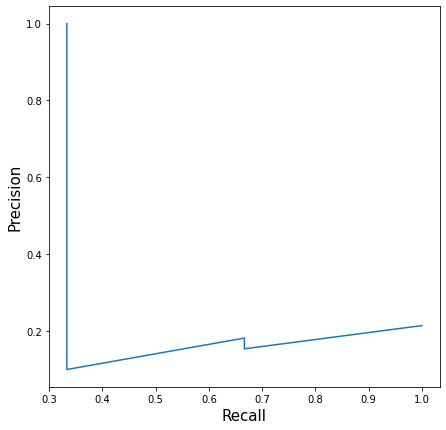

In [9]:
#@ GETTING PRECISION AND RECALL VALUES: 
precisions = []                                    # Initializing a List. 
recalls = []                                       # Initializing a List. 
for i in thresholds:
    temp_pred=[1 if x>=i else 0 for x in y_pred]   # Getting Predictions. 
    p = precision(y_true, temp_pred)               # Getting Precision. 
    r = recall(y_true, temp_pred)                  # Getting Recall. 
    precisions.append(p)
    recalls.append(r)

#@ PLOTTING PRECISION AND RECALL CURVE: 
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel("Recall", fontsize=15)
plt.ylabel("Precision", fontsize=15)
plt.show();

**F1 SCORE:**
- **F1 Score** is a metric that combines both precision and recall. It is defined as a simple weighted average of precision and recall. 
- **F1 = 2PR / (P + R)**

In [10]:
#@ INITIALIZING F1 SCORE FUNCTION: 
def f1(y_true, y_pred):                         # Defining F1 Score Function. 
    p = precision(y_true, y_pred)               # Initializing Precision. 
    r = recall(y_true, y_pred)                  # Initializing Recall. 
    score = 2 * p * r / (p + r)                 # Getting F1 Score. 
    return score 

#@ IMPLEMENTATION OF F1 SCORE FUNCTION: 
print(f1(l1, l2))
print(metrics.f1_score(l1, l2))

0.5714285714285715
0.5714285714285715


**SENSITIVITY AND SPECIFICITY:**
- **True Positive Rate** or **Recall** is known as **Sensitivity**. 
- **1 - False Positive Rate** is known as **Specificity**. 

In [13]:
#@ INITIALIZING TRUE POSITIVE RATE: 
def tpr(y_true, y_pred):                       # Defining TPR Function. 
    return recall(y_true, y_pred)              # Implementation of Recall. 

#@ INITIALIZING FALSE POSITIVE RATE: 
def fpr(y_true, y_pred):                       # Defining FPR Function. 
    fp = false_positive(y_true, y_pred)        # Getting False Positive. 
    tn = true_negative(y_true, y_pred)         # Getting True Negative. 
    return fp / (tn + fp)

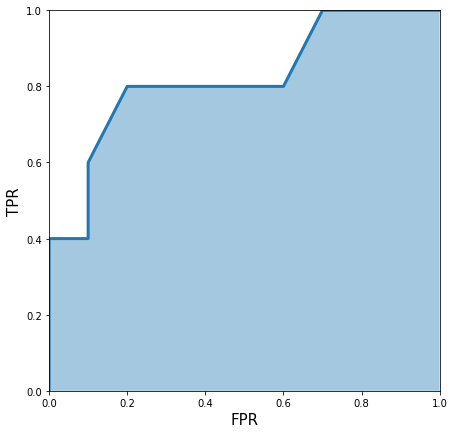

In [14]:
#@ INSPECTING TPR AND FPR: EXAMPLES: 
tpr_list, fpr_list = [], []                             # Initializing Lists.
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]  # Initializing Actual Targets. 
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 
          0.66, 0.3, 0.2, 0.85, 0.15, 0.99]             # Initializing Predicted Probabilities. 
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 
              0.8, 0.85, 0.9, 0.99, 1.0]                # Initializing Thresholds. 
for thresh in thresholds:
    temp_pred = [1 if x>=thresh else 0 for x in y_pred] # Getting Predictions for Thresholds. 
    temp_tpr = tpr(y_true, temp_pred)                   # Initializing TPR. 
    temp_fpr = fpr(y_true, temp_pred)                   # Initializing FPR. 
    tpr_list.append(temp_tpr)                           # Appending TPR Values. 
    fpr_list.append(temp_fpr)                           # Appending FPR Values. 

#@ PLOTTING TPR AND FPR VALUES: 
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel("FPR", fontsize=15)
plt.ylabel("TPR", fontsize=15)
plt.show();

**LOG LOSS FUNCTION:**

In [16]:
#@ FUNCTION TO CALCULATE LOG LOSS: 
def log_loss(y_true, y_proba):                      # Defining Log Loss Function. 
    epsilon = 1e-15                                 # Initialization. 
    loss = []                                       # Initialization. 
    for yt, yp in zip(y_true, y_proba):
        yp = np.clip(yp, epsilon, 1 - epsilon)      # Initializing Prediction Probabilites. 
        temp_loss = -1.0 * (yt * np.log(yp) + 
                            (1-yt)*np.log(1-yp))
        loss.append(temp_loss)                      # Appending Loss. 
    return np.mean(loss)

#@ IMPLEMENTATION OF LOG LOSS: 
y_true = [0, 0, 0, 0, 1, 0, 1, 
          0, 0, 1, 0, 1, 0, 0, 1]                   # Initializing Actual Targets. 
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 
           0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
           0.85, 0.15, 0.99]                        # Initializing Predicted Probabilities. 
log_loss(y_true, y_proba)                           # Inspection. 

#@ IMPLEMENTATION OF LOG LOSS: 
metrics.log_loss(y_true, y_proba)                   # Inspection. 

0.49882711861432294

In [17]:
#@ INITIALIZING MACRO AVERAGED PRECISION FUNCTION: 
def macro_precision(y_true, y_pred):                            # Defining Function. 
    num_classes = len(np.unique(y_true))                        # Initializing Number of Classes. 
    precision = 0                                               # Initialization. 
    for class_ in range(num_classes):
        temp_true = [1 if p==class_ else 0 for p in y_true]     # Initializing One Hot Encoding. 
        temp_pred = [1 if p==class_ else 0 for p in y_pred]     # Initializing One Hot Encoding. 
        tp = true_positive(temp_true, temp_pred)                # Getting TP Value. 
        fp = false_positive(temp_true, temp_pred)               # Getting FP Value. 
        temp_precision = tp / (tp + fp)                         # Getting Precision Value. 
        precision += temp_precision
    precision /= num_classes                                    # Getting Average Precision. 
    return precision